# Introduction to scientific computing with Python
*Maxime Sangnier*

September, 2021

## Part 5: Additional topics

# Table of contents
1. [Object-oriented programming](#part1)
    - [What is it?](#part1sec1)
    - [Instanciating a class](#part1sec2)
    - [Creating a class](#part1sec3)
1. [Basics of multiprocessing](#part2)
1. [Machine learning in Python](#part3)
    - [Introduction](#part3sec1)
    - [Relation to statistics](#part3sec2)
    - [Machine learning in Python](#part3sec3)
    - [Scikit-learn API](#part3sec4)
    - [Example](#part3sec5)
1. [Exercises](#part4)
    - [Exercise 1](#part4sec1)
    - [Exercise 2](#part4sec2)
    - [Exercise 3](#part4sec3)
1. [References](#part5)


# Object-oriented programming <a id="part1"></a>
This section is under construction.
Please, refer to the [official documentation](https://docs.python.org/3/tutorial/classes.html).

## What is it? <a id="part1sec1"></a>
A class is probably the most complex and powerful concept you may find in Python (it obviously exists in many other programming languages).
It is a template used to create objects (also called *instances* of the class in question), which generally have many attributes and methods.

Let us remark that Python is a very flexible programming language, with consequently comes with rules we have to obey to cook in occordance with standard practice:
- classe names are often capitalized, in order to differentiate them from functions;
- private attributes are suffixed with `_`.
They are normally only aimed at developpers, not at users;
- attributes should never be modified directly (or very carefully).
They are aimed at defining the object and informing the user.
In order to modify an object, you should use methods.


## Instanciating a class <a id="part1sec2"></a>
We start with a first example, aimed at creating an object from the class `np.ndarray`.

Topics to be addressed:
- parameters of constructor
- methods

In [1]:
'rr'.capitalize()

'Rr'

In [2]:
import numpy as np
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

In order to create the object `arr` (or instanciate the class `np.ndarray`), the constructor of the class is called with a set of parameters.
This constructor returns the desired instance.

In [3]:
arr = np.ndarray(shape=(2, 2), dtype=int)
arr

array([[       52116560, 139685221367808],
       [              0,               0]])

As seen in the documentation, the object `arr` has attributes:

In [4]:
print(arr.shape, arr.size)

(2, 2) 4


which charactarize the object, and methods (these are functions), often aimed at modifying the object or at returning an information given a particular knowledge:

In [5]:
arr.sort()
arr

array([[       52116560, 139685221367808],
       [              0,               0]])

In [6]:
arr.mean(axis=0)

array([2.60582800e+07, 6.98426107e+13])

All attributes and methods can be discovered in the documentation or with `dir`:

In [7]:
dir(arr)[-10:]

['swapaxes',
 'take',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'trace',
 'transpose',
 'var',
 'view']

At the first look, attributes are features (floats, lists, strings…) stored in the object and methods are functions aimed at acting on the object.
However, there may be an overlap between the roles of attributes and methods, as exemplified by the transposition of arrays:

In [8]:
arr.T

array([[       52116560,               0],
       [139685221367808,               0]])

In [9]:
arr.transpose()

array([[       52116560,               0],
       [139685221367808,               0]])

In [10]:
arr

array([[       52116560, 139685221367808],
       [              0,               0]])

Both commands return exactly the same result, without modifying the object nor requiring an information, since `transpose()` is used without arguments (`.T` is actually defined by `transpose()`).
This is so because the transposition of an array may be seen either as a feature of the object (user's point of view) or as an information requiring to browse the array (developper's point of view).

## Creating a class <a id="part1sec3"></a>
Let us start with a naive example.

In [11]:
class Student():
    """
    name: student name
    num: student number
    """
    def __init__(self, name, num=0):
        self.name = name
        self.num = num
        self.mark_ = None
        
    def __str__(self):
        return 'Student {} (number {})'.format(self.name, self.num)
    
    def set_mark(self, mark):
        self.mark_ = mark if type(mark) is str else None
        
    def get_mark(self):
        return 'not filled' if self.mark_ is None else self.mark_

In [12]:
help(Student)

Help on class Student in module __main__:

class Student(builtins.object)
 |  name: student name
 |  num: student number
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, num=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  get_mark(self)
 |  
 |  set_mark(self, mark)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [13]:
roger = Student('Roger', 42)
print(roger)
print('Mark:', roger.get_mark())

Student Roger (number 42)
Mark: not filled


In [14]:
roger.set_mark('A')
print('Mark:', roger.get_mark())

Mark: A


# Basics of multiprocessing <a id="part2"></a>
This section is under construction.
Please, refer to the [official documentation](https://docs.python.org/3/library/multiprocessing.html#module-multiprocessing.pool).

The main idea of multiprocessing is to split a large amount of computations among differents computers or threads inside a computer.
For now, we will focus on the latter case, called multithreading.
It has the advantage to share memory on its own and not to be worried with broadcasting the data among various machines.
In addition, it can quickly be set up on a powerful personnal server or on a virtual machine in the cloud.

Parallel computing particularly shines when:
- there are few expensive tasks rather many cheap ones;
- tasks are single threaded rather than multithreaded.

Below is a naive example of sequential versus parallel computation in a favorable situation.

In [15]:
n = 1000  # Matrix size

make_psd = lambda x: x.dot(x.T)
matrices = [make_psd(np.random.randn(n, n)) for _ in range(4)]

def naive_work(M):
    R = np.ndarray((n, n))
    for i in range(M.size):
        R.flat[i] = np.exp(-M.flat[i])
    return R

In [16]:
from time import time

t_in = time()

res = []
for M in matrices:
    res.append(naive_work(M))
    
t_out = time()

print(f'{t_out - t_in:.0f} seconds')

5 seconds


In [17]:
from multiprocessing import Pool

t_in = time()

with Pool() as p:
    res = p.map(naive_work, matrices)
    
t_out = time()

print(f'{t_out - t_in:.0f} seconds')

2 seconds


**EDIT (thanks to M. Anakök):**

On Windows, the execution of the previous cell may not end or may produce an error.
If so, it may solve the issue to define workers in a seperate python file and to check the scope of the code:

In [19]:
%%writefile workers.py

def naive_work(M):
    R = np.ndarray((n, n))
    for i in range(M.size):
        R.flat[i] = np.exp(-M.flat[i])
    return R

Writing workers.py


In [20]:
import workers

if __name__ == '__main__':
    t_in = time()

    with Pool() as p:
        res = p.map(naive_work, matrices)

    t_out = time()

    print(f'{t_out - t_in:.0f} seconds')

2 seconds


When tasks are multithreaded, parallel computing is useless.

In [18]:
def np_work(M):
    return np.exp(-M)
        
t_in = time()

res = []
for M in matrices:
    res.append(np_work(M))
    
t_out = time()

print(f'{t_out - t_in:.1f} seconds')

0.2 seconds


In [19]:
t_in = time()

with Pool() as p:
    res = p.map(np_work, matrices)
    
t_out = time()

print(f'{t_out - t_in:.1f} seconds')

0.1 seconds


# Machine learning in Python <a id="part3"></a>
## Introduction <a id="part3sec1"></a>
Machine learning is a vibrant scientific field at the connection between computer science, statistics, optimization and functional analysis:
- computer science: machine learning is mainly interested in *algorithms* for solving *tangible problems* (hand-written text recognition, image classification, etc.);
- statistics: it is all about estimating a property of the distribution from which the observed data is drawn;
- optimization: estimation often relies on minimizing an empirical risk;
- functional analysis: convergence guarantees for the algorithms as well as models for the estimator rely on this mathematical field.

The tasks tackled in machine learning are:
- (semi-)supervised learning: discovering a link between an input data (observed) and an outcome (supposed unknown);
- unsupervised learning: discovering hidden patterns in data;
- reinforcement learning: learning to achieve a goal based on interacting with the environment.

The rest of this document will focus on supervised learning.

## Relation to statistics <a id="part3sec2"></a>
Machine learning has deep roots into statistics since its main goal is to estimate a property of a distribution based on an observed sample.
However, machine learning defines a new paradigm of inference, to propose an answer to the difficulty of modeling the distribution of the data.

Unlike inferential statistics, in which practitioners define a statistical model (assumption on the distribution from which is drawn the observed sample), machine learners define a model for the estimator (no assumption on the underlying distribution).

To illustrate our words, let $(X, Y)$ be a couple of random variables with unknown joint distribution.
The main tasks of supervised learning are:
- regression: estimating $x \mapsto \mathbb E[Y ~|~ X=x]$, given that $Y$ has values in $\mathbb R$;
- classification: estimating $x \mapsto \operatorname{sign}\left(\frac{\mathbb P (Y=1 ~|~ X=x)}{\mathbb P (Y=-1 ~|~ X=x)} -1\right)$, given that $Y$ has values in $\{-1, 1\}$.

These tasks of estimating the regression or classification function are done within a hypothesis class of functions (model on the estimator), regardless of the distribution of $(X, Y)$.

## Machine learning in Python <a id="part3sec3"></a>
Several packages are available for doing machine learning in Python, depending on the kind of methods the practitioner opts for:
- [Scikit-learn](http://scikit-learn.org/stable/) and [Shogun](http://www.shogun-toolbox.org/) are for general machine learning;
- [PyTorch](https://pytorch.org/), [TensorFlow](https://www.tensorflow.org/), [Theano](http://deeplearning.net/software/theano/) and [Caffe](http://caffe.berkeleyvision.org/installation.html) are devised for neural networks and deep learning.

Here, we focus on [Scikit-learn](http://scikit-learn.org/stable/), which offers a broad range of machine learning methods and has a simple and well documented API.

## Scikit-learn API <a id="part3sec4"></a>
The general procedure for using a model is:
- creation (for instance of a decision tree):


    clf = tree.DecisionTreeClassifier()
- learning (estimation with data corresponding to $X$ and labels to $Y$):


    clf.fit(data, labels)
- prediction (of unknown labels):


    clf.predict(data)

## Example <a id="part3sec5"></a>
We provide here a (counter)example of a machine learning method for classification.
This one assumes that each class is normally distributed and estimates the Gaussian parameters using maximum likelihood.

Classification score on training data is 95/100.


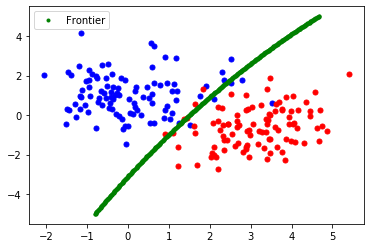

In [20]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data
n = 200  # Sample size
x = np.r_[np.random.randn(n//2, 2) + [0, 1],
         np.random.randn(n//2, 2) + [3, -0.5]]  # Data
y = np.r_[np.ones(n//2), -np.ones(n//2)]  # Labels

# Fit and evaluate the model (classifier)
clf = GaussianNB()  # Model creation
clf.fit(x, y)  # Fit the model
y_pred = clf.predict(x)  # Predict with the model
s = clf.score(x, y)  # Compute the score
print("Classification score on training data is {0:0.0f}/100.".format(s*100))

# Plot data and prediction
fig, ax = plt.subplots()
mks = 10  # Marker size
alpha = 0.1
#ax.plot(x[y_pred>0, 0], x[y_pred>0, 1], 'bo', markersize=mks+5, alpha=alpha)  # Pred
#ax.plot(x[y_pred<0, 0], x[y_pred<0, 1], 'ro', markersize=mks+5, alpha=alpha)  # Pred
ax.plot(x[y>0, 0], x[y>0, 1], 'b.', markersize=mks)  # Ground truth
ax.plot(x[y<0, 0], x[y<0, 1], 'r.', markersize=mks);  # Ground truth

# Plot the frontier
X, Y = np.meshgrid(np.linspace(-5, 5, num=500), np.linspace(-5, 5, num=500))
X, Y = X.ravel(), Y.ravel()

Z = clf.predict_proba(np.c_[X, Y])[:, 0]
ind = np.where(np.fabs(Z-0.5) < 1e-2)
ax.plot(X[ind], Y[ind], 'g.', label="Frontier")

ax.legend(loc="best");

# Exercises <a id="part4"></a>
## Exercise 1 <a id="part4sec1"></a>

Inspired by `scipy.stats`, define a class `Normal`, that represents a random variable following a Gaussian distribution.
The object should have attributes:
- `loc`: location;
- `scale`: scale;
- `mean`: theoretical mean;
- `std`: theoretical standard deviation;
- `var`: theoretical variance;

and methods:
- `pdf(x)`: returns the pdf value for `x`;
- `rvs(size=1)`: returns an iid random sample of the specified sise.

In [ ]:
# Answer

How to redefine the previous class using inheritance?

In [ ]:
# Answer

## Exercise 2 <a id="part4sec2"></a>

Compare time to solve 4 linear systems sequentially and using multithreading.

In [ ]:
# Answer

## Exercise 3 <a id="part4sec3"></a>

We focus here on a classification problem.
Propose a procedure to evaluate the accuracy of a classifer.
Apply this procedure to compare a k-nearest neighbors algorithm with a decision tree on the Iris dataset.

In [ ]:
# Answer

# References <a id="part5"></a>
- [Official documentation](https://docs.python.org/3/tutorial/index.html).
- [Scikit-learn website](http://scikit-learn.org/stable/).